# Monitoring Notebook

In [9]:
# Settings and imports.
%matplotlib inline
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates
import seaborn as sns
import data

sns.set()
sns.set_context('poster')
#sns.set_style('whitegrid')
pd.options.display.float_format = '{:.2f}'.format

In [10]:
ts = data.load('robomission-2018-03-10/task_sessions.csv')
ts = ts[ts.time_spent > 0]
ts = ts.assign(date=ts.end.str[:10])

In [11]:
grouped_ts = ts.groupby('date')
metrics = pd.DataFrame(OrderedDict(
    active_students=grouped_ts.student.nunique(),
    solving_hours=grouped_ts.time_spent.sum() / 3600,
    solved_count=grouped_ts.solved.sum(),
    success_rate=grouped_ts.solved.mean(),
)).sort_index()
metrics.index = pd.to_datetime(metrics.index)

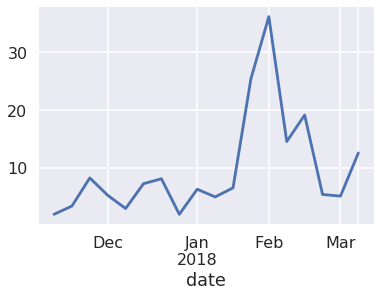

In [12]:
metrics.active_students.resample('1W').mean().plot()

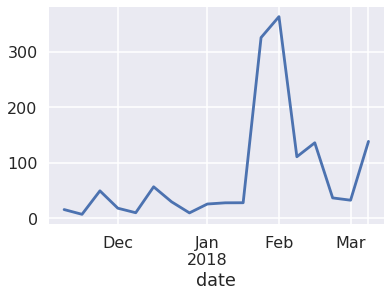

In [13]:
metrics.solved_count.resample('1W').mean().plot()